# Functional Approximation

The idea behind functional approximations is quite simple
􏰀 We are given some kind of data $(x_i , y_i )_{i=1}^N$ from which we know there exist a relation $y = g(x)$. From this data we try to find an approximation of $g(·)$, let’s call it $\tilde{g}(·)$.

Every approximation I have seen can be boiled down to the form:

$$\tilde{g} ( x ) = 􏰄\sum_{i=0}^N c_i T_i ( x )$$

where $c_i$ are coefficients to be solved for in order to have a “good” fit, and $T_i(x)$ are the basis functions.

There are two categories of functional approximations:

- **Finite element methods** which use basis functions that are zero on most of the domain. Examples are linear interpolation and spline interpolation.

- **Spectral methods** which use basis functions that are nonzero on most of the domain. Examples are Chebyshev polynomials.

## Finite element methods: Linear Interpolation

In [5]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp # Main interpolation library in Python
%matplotlib inline
%config InlineBackend.figure_format ='retina' # (Mac only). To get high resolution figures in notebook. 

Lets use as example the sine function. So first let's define it:

In [340]:
def y(x):
    return np.sin(x)

In [344]:
# evaluate the true sine function between 0 and 10 for 100 points
x = np.linspace(0,10,100)
res = y(x)

# Lets create a subset of data points
data_x = np.linspace(0,10,10) 
data_y = y(data_x)

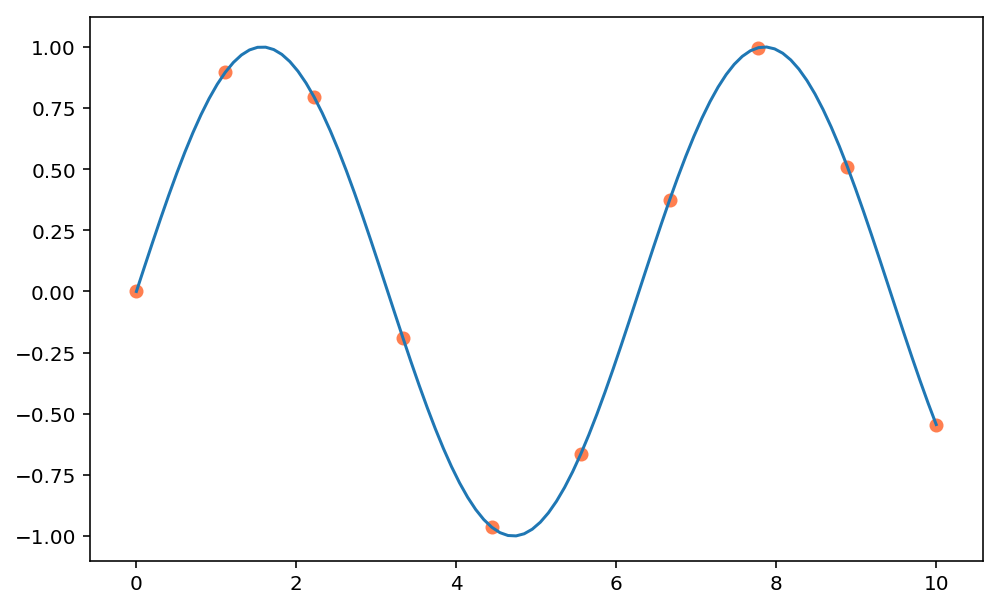

In [342]:
# Now we plot both
plt.figure(figsize=(8,5))
plt.plot(x, res) # evaluation of all 100 points
plt.scatter(data_x, data_y, c = 'coral') # scatter of the subsample
plt.show()

> **Definition**: 
> *given a collection of data $(x_i, y_i)_{i=1}^N$, and if $x\in [x_i, x_{i+1}]$, the linear interpolation is given by:*
>
> $$ \tilde{g}_i(x) = g(x_i)+ \left(\frac{g(x_{i+1})- g(x_i)}{x_{i+1}-x_i}\right) (x-x_i) $$  

In [348]:
# Apply the linear interpolation given data points, x and y
y_app = interp.interp1d(data_x, data_y, kind="linear")

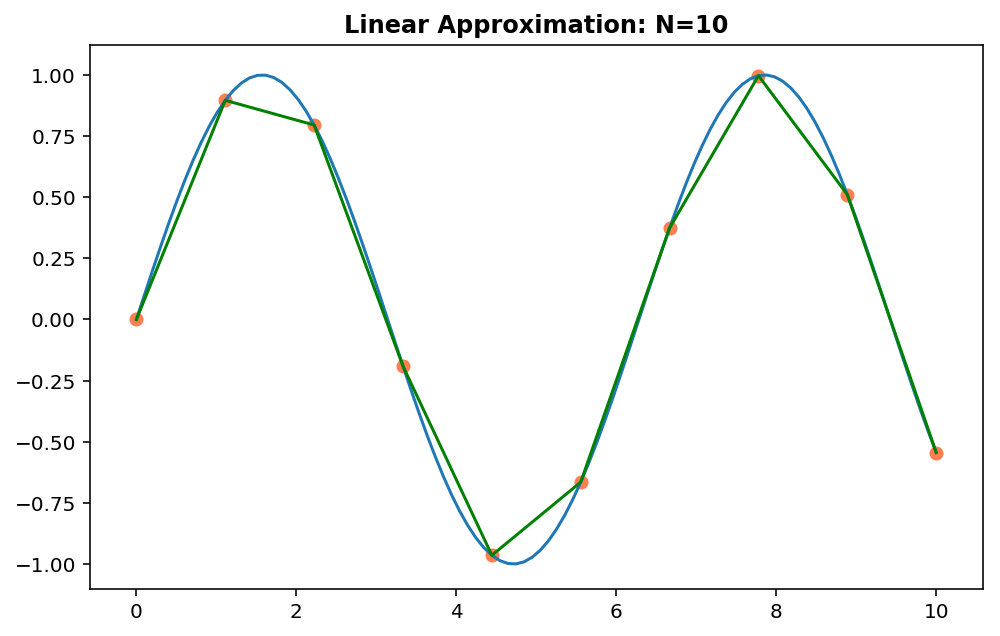

In [347]:
# Compare the true function with the linear interpolation approximation of that function
plt.figure(figsize=(8,5))
plt.plot(x, res)
plt.plot(x, y_app(x), c = 'green')
plt.scatter(data_x, data_y, c = 'coral')
plt.title('Linear Approximation: N=10',weight = "bold")
plt.show()

Not bad, not great either.

### What if we add more data points?

In [349]:
# Lets use 30 points instead of 10
data_x2 = np.linspace(0,10,30) 
data_y2 = y(data_x2)
y_app = interp.interp1d(data_x2, data_y2, kind="linear")

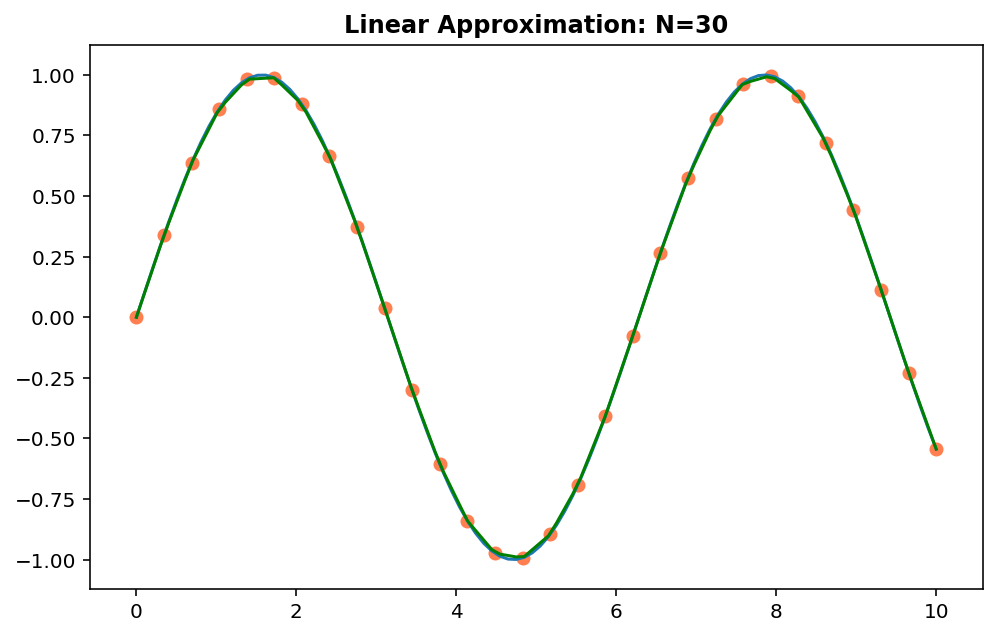

In [350]:
plt.figure(figsize=(8,5))
plt.plot(x, res)
plt.plot(x, y_app(x), c = 'green')
plt.scatter(data_x2, data_y2, c = 'coral')
plt.title('Linear Approximation: N=30', weight = "bold")
plt.show()

Not bad!

## Finite element methods: Splines

- As with linear interpolation, splines use local approximations.
􏰀
- The difference is that the local approximation is not linear.

> **Definition**: 
> *given a collection of data $(x_i, y_i)_{i=1}^N$, and if $x\in [x_i, x_{i+1}]$, a cubic spline is given by:*
>
> $$ \tilde{g}_i(x) = a+b x+ c x^2 + d x^3 $$  

The question is how do we identify these 4 parameters from the data?

- At each piece we have function evaluation at the two interval endpoints, i.e. $\tilde{g}_i(x_i) = g_i(x_i)$ and $\tilde{g}_i(x_{i+1}) = g_i(x_{i+1})$. From this we have two conditions. We need another 2.

- the other two conditons come from ensuring that $\tilde{g}^\prime_i (x_{i+1}) = \tilde{g}^\prime_{i+1} (x_{i+1})$, and $\tilde{g}^{\prime \prime}_i (x_{i+1}) =  \tilde{g}^{\prime \prime}_{i+1} (x_{i+1})$ at all nodes.

This means that with the exception of the two extremes in the data, we have 4 conditions for 4 unkowns and can recover the 4 parameters for each piece. 
- In addition, we use the “not-a-knot” end-condition
$\tilde{g}^{\prime \prime}_1 (x_1) = \tilde{g}^{\prime \prime}_N (x_N) = 0$ in order to identify the parameters in the extreme pieces.

In [334]:
tck = interp.splrep(data_x, data_y)
y_app_spl = interp.splev(x, tck)

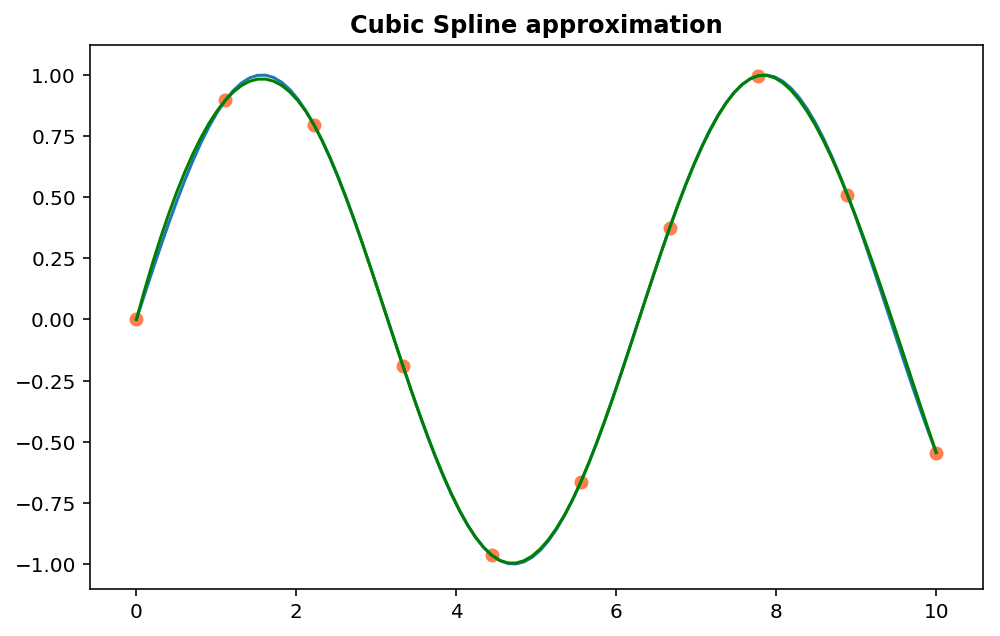

In [335]:
plt.figure(figsize=(8,5))
plt.plot(x, res)
plt.plot(x, y_app_spl, c = 'green')
plt.scatter(data_x, data_y, c = 'coral')
plt.title('Cubic Spline approximation',  weight = "bold")
plt.show()

- Splines are normally much better at approximating smooth functions than linear interpolation.
􏰀
- Yet, they are slower, and less robust to kinky function behavior.
􏰀
- It is recommended to program everything using linear interpolation, and then, if things are smooth, switch to splines at a final run to get prettier graphs.

## Spectral methods: Chebyshev Polynomials

- Splines are comprised by several “local” polynomial approximations

- Spectral methods uses instead one large polynomial for the entire domain
􏰀 
- Benefits: For “well-behaved” functions, these will do quite well with very few parameters to be identified. Tremendous speed!
􏰀
- Costs: Can display oscillating and very weird behavior.
􏰀
- Extrapolation is usually out of the question.

Chebyshev Polynomials are denoted $T_n: [−1,1]\to[−1,1]$.

And they are recursively defined as:

$$ T_0 = 1 $$
$$ T_1 = x $$
$$ T_n = 2xT_{n-1} - T_{n-2} $$


Let's take a look at them:

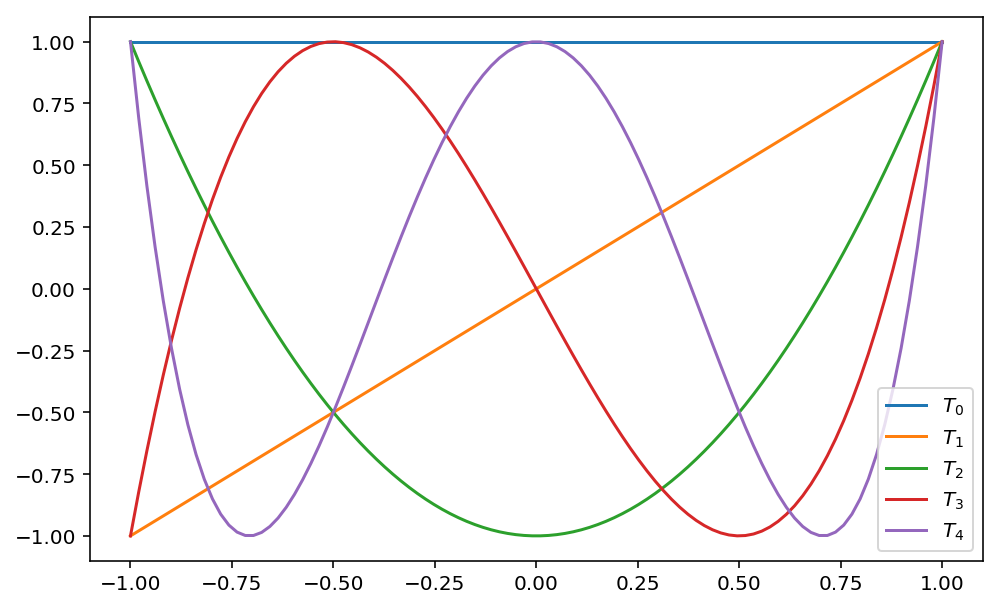

In [353]:
k = np.linspace(-1,1,100)
plt.figure(figsize=(8,5))
plt.plot(k, np.ones(100), label="$T_0$")
plt.plot(k, k, label="$T_1$")
plt.plot(k, 2*k**2-1, label="$T_2$")
plt.plot(k, 2*k*(2*k**2-1)-k, label="$T_3$")
plt.plot(k, 2*k*(2*k*(2*k**2-1)-k)-(2*k**2-1), label="$T_4$")
plt.legend()
plt.show()

### How to implement?

- Convert your x data to the interval $[-1,1]$. Call this new data X. Define $b=2/(x_{max}-x_{min})$ and $a= 1 -b x_{max}$. 

Then $X = a + b x$ is in $[-1,1]$.

- Recursively calculate your polynomials and put them in a matrix, M:

$$M = \begin{pmatrix} T_0(x_1) & T_1(x_1) & T_2 (x_1) & \cdots \\
                      T_0(x_2) & T_1(x_2) & T_2 (x_2) & \cdots \\
                      \vdots &  & \ddots &
\end{pmatrix}$$

- Finally use least squares to find the coefficients:
 
 $$ y = a_0 T_0(x) + a_1 T_1 (x) + a_2 T_2 (x) + ... $$

In [370]:
c = np.polynomial.chebyshev.chebfit(data_x, data_y, deg=6)

y_app_cheb = np.polynomial.chebyshev.chebval(x, c)

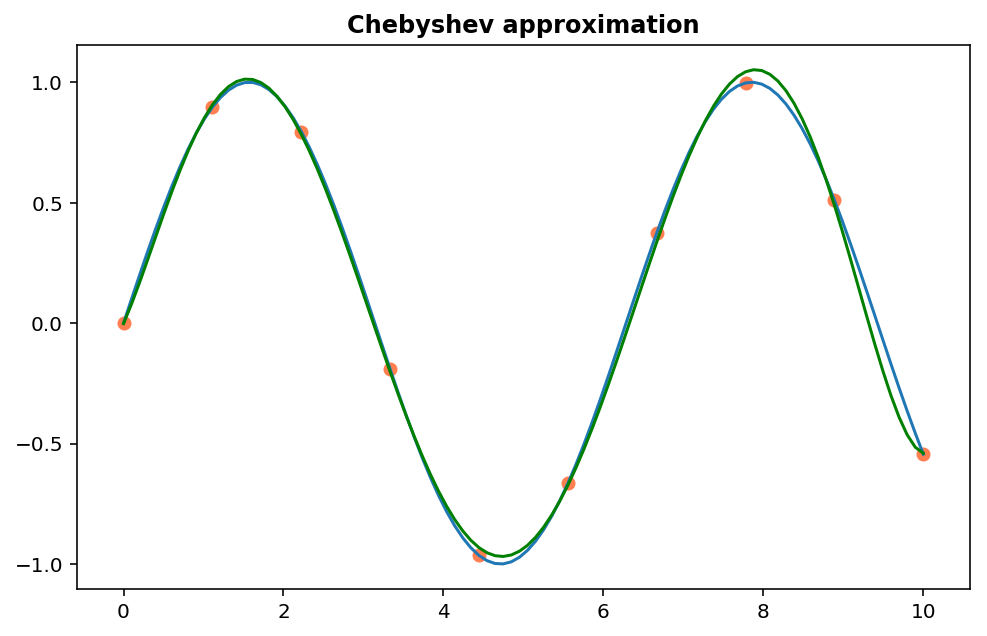

In [371]:
plt.figure(figsize=(8,5))
plt.plot(x, res)
plt.plot(x, y_app_cheb, c = 'green')
plt.scatter(data_x, data_y, c = 'coral')
plt.title('Chebyshev approximation',  weight = "bold")
plt.show()

#### Exercise 13.1 

- Import wageprofile (defined as yi) and agebrackets (defined as xi) from wage.py where you can find yearly median wage by age group. Use the interp.interp1d() function from the scipy.interpolate class. 

- Plot the data points and compute the linear interpolation and extrapolation for ages 16 to 90 years old.

In [75]:
from wage import *

In [76]:
wage_app = interp.interp1d(agebrackets, wageprofile, kind="linear")

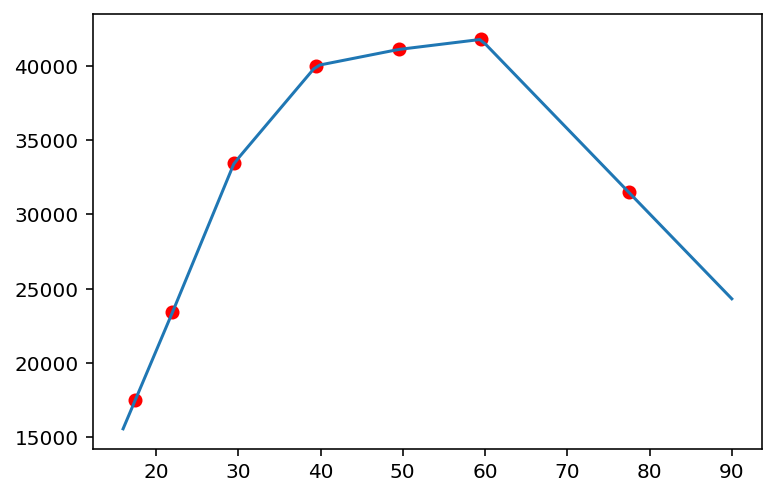

In [40]:
plt.plot(ages, wage_app(ages))
plt.scatter(agebrackets, wageprofile, color="r")
plt.show()

In [24]:
wage_app2 = interp.interp1d(agebrackets, 
                           wageprofile, 
                           kind="linear", 
                           fill_value="extrapolate")

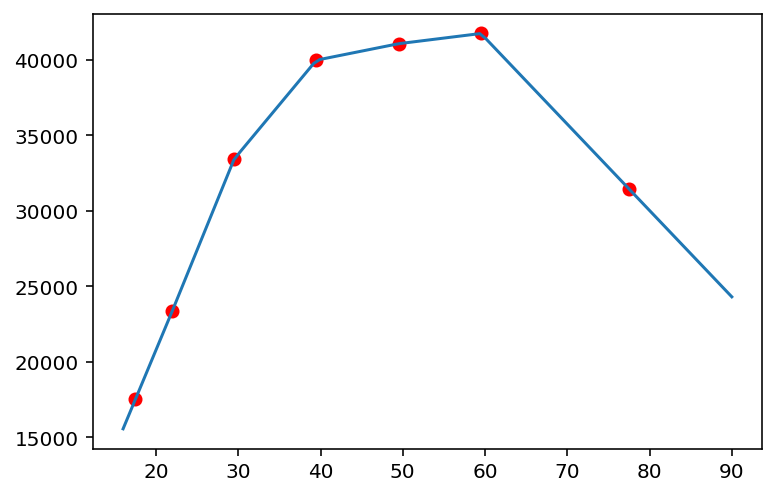

In [27]:
plt.scatter(agebrackets, wageprofile, color="r")
ages = np.linspace(16, 90, 100)
plt.plot(ages, wage_app2(ages))
plt.show()

#### Exercise 13.2

- Plot the data points again now using the cubic Spline instead. Use the interp.CubicSpline() function

In [41]:
wage_app_cubic = interp.CubicSpline(agebrackets, wageprofile, 
                        extrapolate = True)

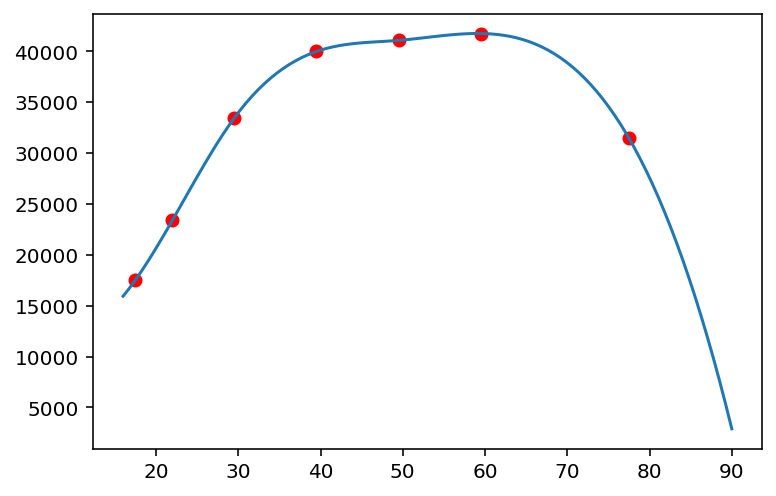

In [47]:
ages = np.linspace(16, 90, 100)
plt.scatter(agebrackets, wageprofile, color="r")
plt.plot(ages, wage_app_cubic(ages))
plt.show()

#### Exercise 13.3 

Let's approximate the following function:

$$ f(x) = \min (\sin(x), 0.7) $$

A. Compute the linear interpolation approximation of the function and plot it.

B. Repeat with a cubic spline and with the Chebyshev polynomials (use 6). 

C. Define the approximation error.

D. Plot the approximation error for all three types of approximations in the same figure to compare them.

E. Which approximation delivers the lowest approximation error?

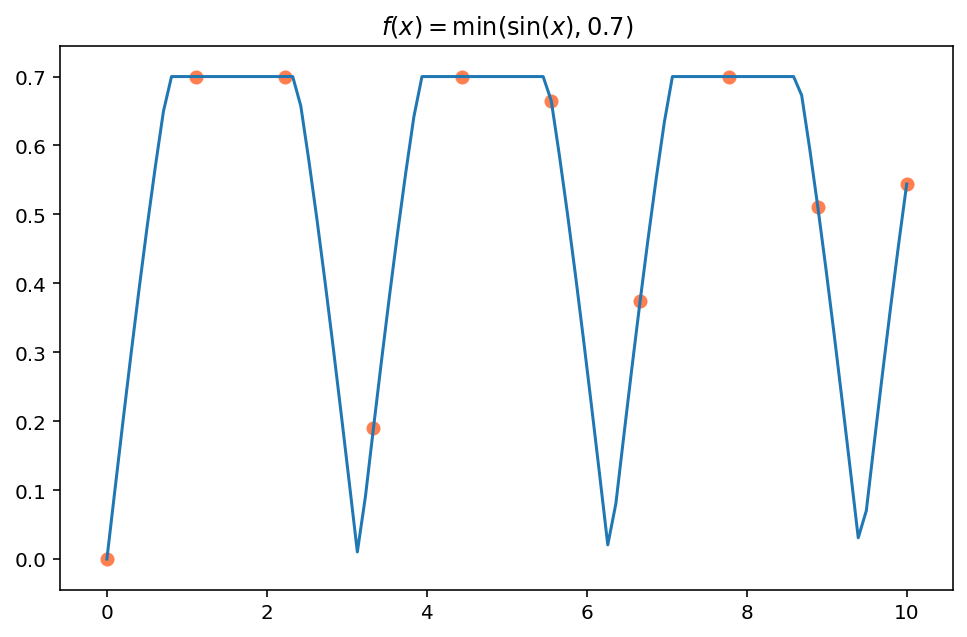

In [49]:
def fun(x):
    res = []
    for i in x:
        res.append(min(abs(np.sin(i)), 0.7))
    return res

x = np.linspace(0,10,100)
data_x = np.linspace(0,10,10) 

plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (\sin(x), 0.7)$') # r before the title string calls latex
plt.show()

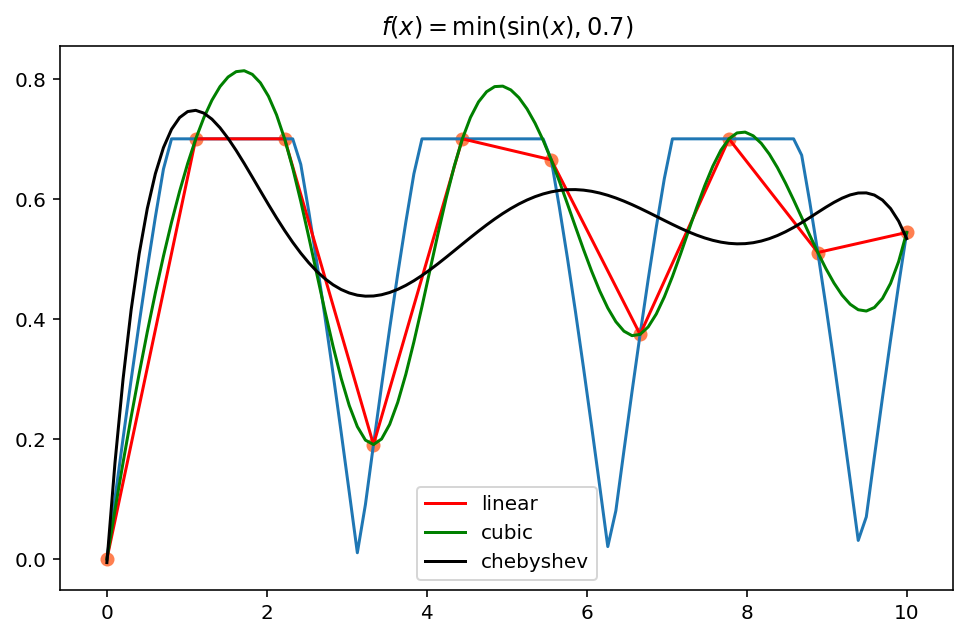

In [58]:
y_app_lin = interp.interp1d(data_x,  fun(data_x), kind="linear")
y_app_cubic = interp.interp1d(data_x,  fun(data_x), kind="cubic")
c = np.polynomial.chebyshev.chebfit(data_x, fun(data_x), deg=6)
y_app_cheb = np.polynomial.chebyshev.chebval(x, c)

plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.plot(x, y_app_lin(x), color="r", label="linear")
plt.plot(x, y_app_cubic(x), color="g", label="cubic")
plt.plot(x, y_app_cheb, color="k", label="chebyshev")
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (\sin(x), 0.7)$') # r before the title string calls latex
plt.legend()
plt.show()

In [61]:
def error(x, true_fun, app_fun, function):
    if function == 1:
        return abs(true_fun(x) - app_fun(x))
    else:
        return abs(true_fun(x) - app_fun)

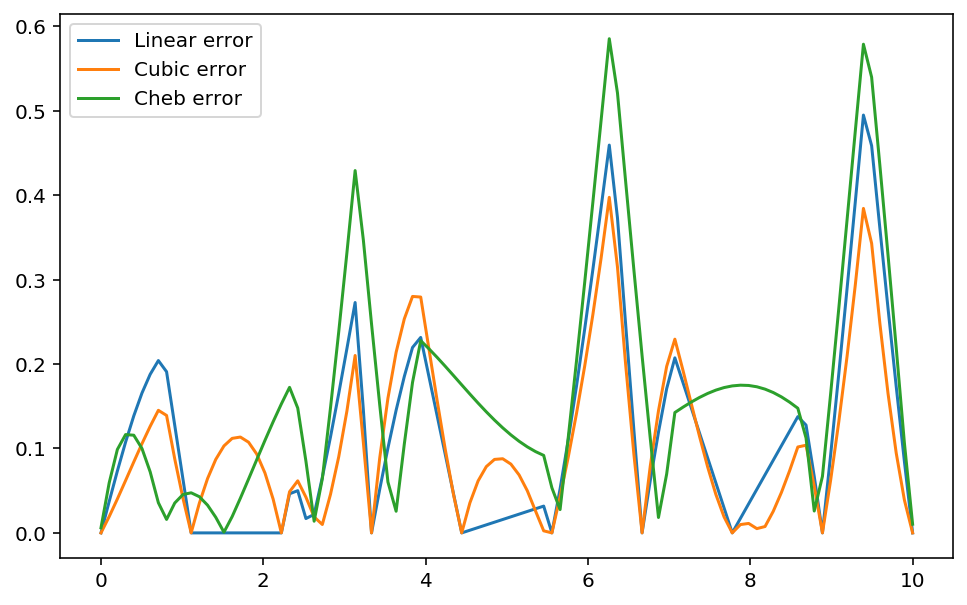

11.25802181600246 10.556488542616759 16.773126607181844


In [74]:
plt.figure(figsize=(8,5))
plt.plot(x, error(x, fun, y_app_lin, True), label="Linear error")
plt.plot(x, error(x, fun, y_app_cubic, True), label="Cubic error")
plt.plot(x, error(x, fun, y_app_cheb, False), label="Cheb error")
plt.legend()
plt.show()
print(np.sum(error(x, fun, y_app_lin, True)), np.sum(error(x, fun, y_app_cubic, True)), np.sum(error(x, fun, y_app_cheb, False)))